<a href="https://colab.research.google.com/github/yun1138/colab/blob/main/game_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unicodecsv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10766 sha256=c425837c420e2a44c2bc48331e5fde9ac38942392f6bbce40a759cdfdc872961
  Stored in directory: /root/.cache/pip/wheels/35/dd/44/ccb37563a01457f5de74ccedccaee81b01a53e12addeab5e0f
Successfully built unicodecsv


In [ ]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import time
import pandas as pd
import unicodecsv as ucsv
import matplotlib.pyplot as plt

In [ ]:
current=time.strftime("%Y-%m-%d-%H%M",time.localtime())
print("Current Time:",current)
filename = ['LOL_鐵牌','LOL_銅牌','LOL_銀牌','LOL_黃金','LOL_白金','LOL_鑽石','LOL_大師']

try:
    rec_time=str(input('是否依現在時間點來做CSV檔命名(以免覆蓋之前的時間點)? (y/N)'))
except:
    print("發生錯誤")
    raise
else:
    if(rec_time=='y' or rec_time== 'Y'):
        print("(依照時間點進行檔案命名)")
        filename = ['LOL_鐵牌'+current,'LOL_銅牌'+current,'LOL_銀牌'+current,'LOL_黃金'+current,'LOL_白金'+current,'LOL_鑽石'+current,'LOL_大師'+current]
    else:
        print("(不依時間點進行檔案命名)")


ranking = ['iron','bronze','silver','gold','','diamond','master']
for r in range(len(ranking)):
  url = 'https://www.leagueofgraphs.com/champions/builds/'+ranking[r]
  request_site = Request(url, headers={"User-Agent": "Mozilla/5.0"})
  webpage = urlopen(request_site).read()

  soup=BeautifulSoup(webpage,'html5lib')
  table=soup.find('div',attrs={'id':'mainContent'})

  with open(filename[r]+'.csv', 'wb') as csvfile:
    writer = ucsv.writer(csvfile,encoding='utf-8-sig')
    data = [[u"編號","名字","選用率","勝率","禁用率","擊殺","死亡","助攻"]]
    #writer.writerows(data)

    rank_result={}
    i=0
    names=soup.findAll('span',attrs={'class':"name"})
    for n in names:
      rank_result[i]=[]
      rank_result[i].append((n.get_text().strip()))
      i+=1

    rate=table.findAll('progressbar')
    i=0
    j=0
    for t in rate:
      #print(t['data-value'])
      rank_result[i].append(t['data-value'])
      j+=1
      if j % 3 == 0:
        i+=1
        j=0

    #kill
    i=0
    kills=soup.findAll('span',attrs={'class':"kills"})
    for n in kills:
      rank_result[i].append((n.get_text().strip()))
      i+=1

    #deaths
    i=0
    deaths=soup.findAll('span',attrs={'class':"deaths"})
    for n in deaths:
      rank_result[i].append((n.get_text().strip()))
      i+=1

    #assists
    i=0
    assists=soup.findAll('span',attrs={'class':"assists"})
    for n in assists:
      rank_result[i].append((n.get_text().strip()))
      i+=1


    #print("\t名字\t\t選用率\t 勝率\t禁用率\t擊殺\t死亡\t助攻")
    for i in range(len(rank_result)):
      #print("%8s\t\t%s\t%s\t%s\t%s\t%s\t%s"%(rank_result[i][0],rank_result[i][1],rank_result[i][2],rank_result[i][3],rank_result[i][4],rank_result[i][5],rank_result[i][6]))
      data.append([i,rank_result[i][0],rank_result[i][1],rank_result[i][2],rank_result[i][3],rank_result[i][4],rank_result[i][5],rank_result[i][6]])
    #print(data)
    writer.writerows(data)
    if ranking[r]=='':
      print("--- Ranking: platinum End ---")
    else:
      print("--- Ranking: ",ranking[r],"End ---")

###-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 功能1
    # result 陣列
    lr = len(rank_result)
    array_result = [[[]]*7] * lr
    for k in range(len(rank_result)):
        array_result[[k][0]] = rank_result[[k][0]]

    #依字母Ａ～Ｚ排序
    array_result.sort(key=lambda x:x[0], reverse = False)
    #print("名字\t\t選用率\t勝率\t禁用率\t擊殺\t死亡\t助攻")


    if ranking[r]=='iron':
        iron_array = array_result
    elif ranking[r]=='bronze':
        bronze_array = array_result
    elif ranking[r]=='silver':
        silver_array = array_result
    elif ranking[r]=='gold':
        gold_array = array_result
    elif ranking[r]=='':
        rank_array = array_result
    elif ranking[r]=='diamond':
        diamond_array = array_result
    else:
        master_array = array_result

final_array = [[[]]*8] * lr

for i in range(len(iron_array)):
    list_array = [iron_array[i][0],float(iron_array[i][2]),float(bronze_array[i][2]),float(silver_array[i][2]),
                  float(gold_array[i][2]),float(rank_array[i][2]),float(diamond_array[i][2]),float(master_array[i][2])]
    final_array[[i][0]] = list_array

df = pd.DataFrame(final_array)
df.columns = ["name", "IRON", "BRONZE", "SILVER", "GOLD", "PLATINUM", "DIAMOND", "MASTER"]
#print(df)
df.to_csv('rank_df.csv')
print('CSV Done')
###-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Current Time: 2022-12-21-1535
是否依現在時間點來做CSV檔命名(以免覆蓋之前的時間點)? (y/N)N
(不依時間點進行檔案命名)
--- Ranking:  iron End ---
--- Ranking:  bronze End ---
--- Ranking:  silver End ---
--- Ranking:  gold End ---
--- Ranking: platinum End ---
--- Ranking:  diamond End ---
--- Ranking:  master End ---
CSV Done


In [ ]:
###-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 功能 2
df_2 = pd.DataFrame(final_array)
ts = df_2.T

ts.loc[:,'rank'] = ['','IRON','BRONZE','SILVER','GOLD','PLATINUM','DIAMOND','MASTER']
ts.columns = ts.loc[0]
ts = ts.drop(0)

name = input("Please enter the name : ")
name = str(name)

ts.plot(x='',y=name, figsize=(10,7), title='rank')

Please enter the name : Aatrox
Please enter the rank　: gold


<function matplotlib.pyplot.show(*args, **kw)>

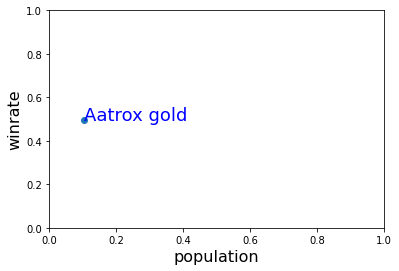

In [ ]:
###-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# 功能 3


lr = len(rank_result)
final_array_2 = [[]] * lr
for i in range(len(iron_array)):
    list_array = [iron_array[i][0],float(iron_array[i][1]),float(iron_array[i][2]),
                  float(bronze_array[i][1]),float(bronze_array[i][2]),
                  float(silver_array[i][1]),float(silver_array[i][2]),
                  float(gold_array[i][1]),float(gold_array[i][2]),
                  float(rank_array[i][1]),float(rank_array[i][2]),
                  float(diamond_array[i][1]),float(diamond_array[i][2]),
                  float(master_array[i][1]),float(master_array[i][2])]
    final_array_2[[i][0]] = list_array
name = str(input("Please enter the name : "))
rank = str(input("Please enter the rank　: "))
if rank == "iron":
  rankn = 1
elif rank == "bronze":
  rankn = 3
elif rank == "silver":
  rankn = 5
elif rank == "gold":
  rankn = 7
elif rank == "platinum":
  rankn = 9
elif rank == "diamond":
  rankn = 11
elif rank == "master":
  rankn = 13
data = []
for i in final_array_2:
  if i[0] == name:
    data = i

data_x = data[rankn]
data_y = data[rankn+1]
plt.scatter(data_x,data_y)
plt.text(data_x,data_y,name+" "+rank,size=18,color='blue')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("population",size=16)
plt.ylabel("winrate",size=16)
plt.show